In [2]:
# 手写数字模型
import tensorflow as tf

minist = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 10s 1us/step


In [8]:
train, test = minist
train_x, train_y = train
test_x, test_y = test
print(train_x.shape)

(60000, 28, 28)


In [22]:
# 基于keras构建模型
# 784: 28 * 28
def modelDef(input_shape=(784,)):
    Input = tf.keras.layers.Input(shape=input_shape)
    h1 = tf.keras.layers.Dense(256)(Input)
    h2 = tf.keras.layers.Dense(64)(h1)
    out = tf.keras.layers.Dense(10)(h2)#手写数字识别
    model = tf.keras.Model(inputs=Input, outputs=out)
    return model

In [46]:
model = modelDef()
x = tf.reshape(train_x, [-1, 784])
#归一化
x = x / 255
y = tf.one_hot(train_y, depth=10)
optimizers = tf.keras.optimizers.SGD(lr = 0.001)
all_loss = []

for i in range(1000):
    with tf.GradientTape() as tape:
        pre_out = model(x)
        loss = tf.reduce_sum(tf.square(pre_out - y)) / x.shape[0]
        all_loss.append(loss)
    if i%50==0:
        print('steps {}, loss {}'.format(i, loss))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizers.apply_gradients(zip(grads, model.trainable_variables))

steps 0, loss 5.56854248046875
steps 50, loss 1.8341861963272095
steps 100, loss 1.3916624784469604
steps 150, loss 1.1849193572998047
steps 200, loss 1.0610332489013672
steps 250, loss 0.9766520857810974
steps 300, loss 0.9145409464836121
steps 350, loss 0.8664043545722961
steps 400, loss 0.8277089595794678
steps 450, loss 0.7957454323768616
steps 500, loss 0.768782913684845
steps 550, loss 0.7456572651863098
steps 600, loss 0.7255526185035706
steps 650, loss 0.7078773379325867
steps 700, loss 0.6921904683113098
steps 750, loss 0.6781554222106934
steps 800, loss 0.6655097603797913
steps 850, loss 0.654045820236206
steps 900, loss 0.6435965299606323
steps 950, loss 0.6340256929397583


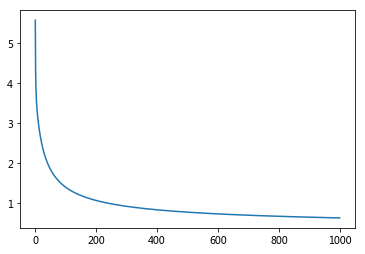

In [48]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1000), np.array(all_loss))
plt.show()